# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | elk city
Processing Record 3 of Set 1 | rabo de peixe
Processing Record 4 of Set 1 | hadibu
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | chiras
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | martapura
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | aleksin
Processing Record 21 of Set 1 | gaspe
Processing Record 22 of Set 1 | borogo

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,282.55,72,94,15.37,SH,1696141066
1,elk city,35.4120,-99.4043,297.27,53,20,5.14,US,1696140792
2,rabo de peixe,37.8000,-25.5833,293.14,99,75,5.66,PT,1696141067
3,hadibu,12.6500,54.0333,301.47,75,99,3.36,YE,1696141067
4,port macquarie,-31.4333,152.9167,297.53,59,82,7.44,AU,1696141068


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,282.55,72,94,15.37,SH,1696141066
1,elk city,35.4120,-99.4043,297.27,53,20,5.14,US,1696140792
2,rabo de peixe,37.8000,-25.5833,293.14,99,75,5.66,PT,1696141067
3,hadibu,12.6500,54.0333,301.47,75,99,3.36,YE,1696141067
4,port macquarie,-31.4333,152.9167,297.53,59,82,7.44,AU,1696141068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

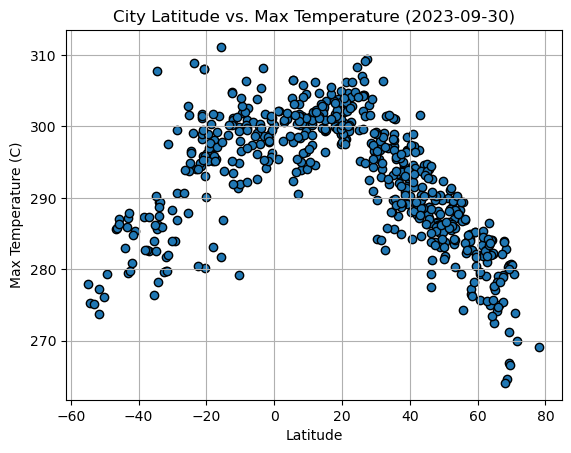

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

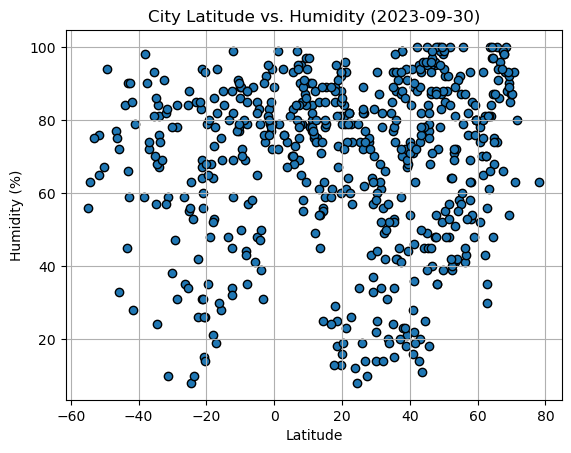

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

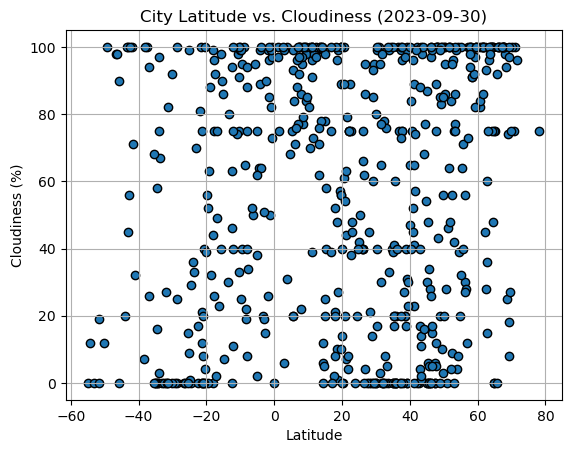

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

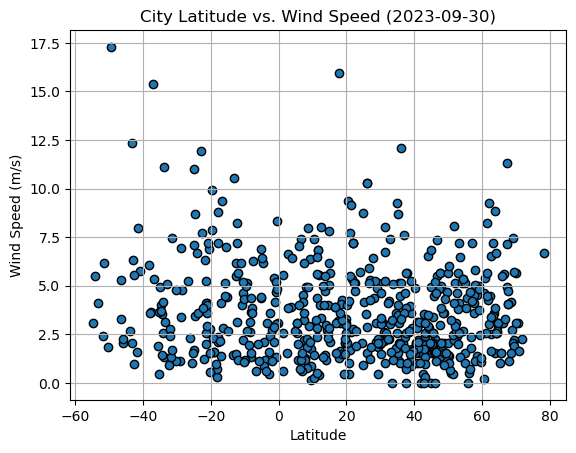

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-09-30)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress()

TypeError: linregress() missing 1 required positional argument: 'x'

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,elk city,35.4120,-99.4043,297.27,53,20,5.14,US,1696140792
2,rabo de peixe,37.8000,-25.5833,293.14,99,75,5.66,PT,1696141067
3,hadibu,12.6500,54.0333,301.47,75,99,3.36,YE,1696141067
5,chiras,35.4167,65.9823,285.67,15,0,1.12,AF,1696141068
8,hamilton,39.1834,-84.5333,291.62,91,0,0.89,US,1696141069


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,282.55,72,94,15.37,SH,1696141066
4,port macquarie,-31.4333,152.9167,297.53,59,82,7.44,AU,1696141068
6,arraial do cabo,-22.9661,-42.0278,294.06,85,70,11.95,BR,1696141068
7,tolanaro,-25.0319,46.9987,301.56,55,9,1.70,MG,1696141069
9,grytviken,-54.2811,-36.5092,275.30,63,12,5.51,GS,1696141070


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7368737669618148


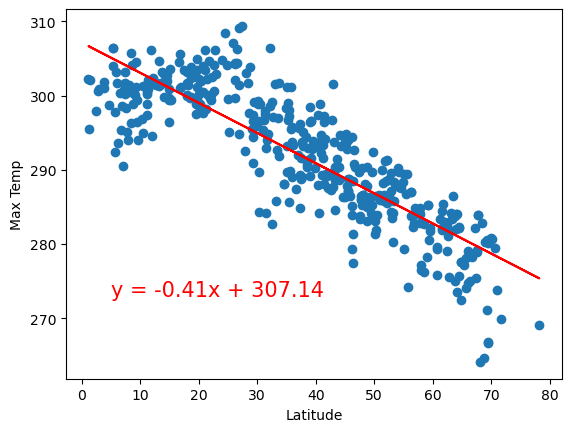

In [38]:
# Linear regression on Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_temp_north = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_temp_north)
reg_temp_north = intercept + slope * x_lat_north
line_temp_north = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_temp_north)
plt.plot(x_lat_north,reg_temp_north,"r")
plt.annotate(line_temp_north,(5,273),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.5231543006648411


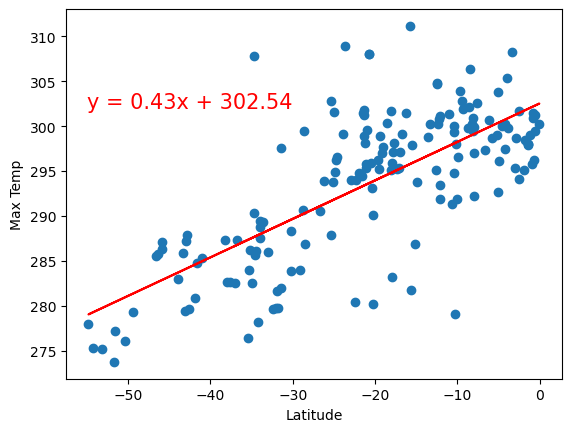

In [40]:
# Linear regression on Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_temp_south = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_temp_south)
reg_temp_south = intercept + slope * x_lat_south
line_temp_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_temp_south)
plt.plot(x_lat_south,reg_temp_south,"r")
plt.annotate(line_temp_south,(-55,302),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The maximum temperatures along the latitude and their relationship in this data suggest that the maximum temperature increases as it approaches a latitude value of 0 - the equator - and decreases as latitude increases in positive value. We can weakly conclude, with the linear regression models for both the northern and southern hemisphere, that the maximum temperature increases as latitude approaches 0, regardless of direction.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.002906391046469888


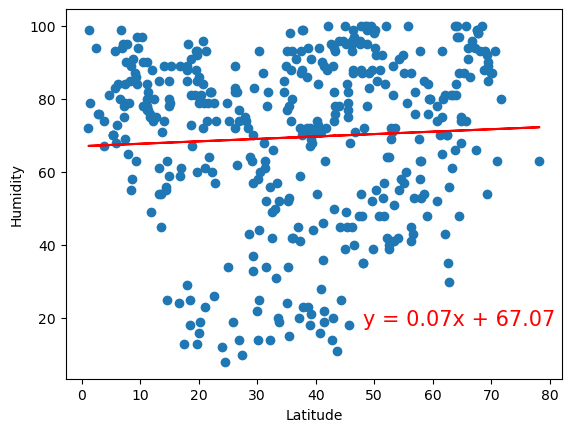

In [42]:
# Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_hum_north = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_hum_north)
reg_hum_north = intercept + slope * x_lat_north
line_hum_north = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_hum_north)
plt.plot(x_lat_north,reg_hum_north,"r")
plt.annotate(line_hum_north,(48,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.004135764465732359


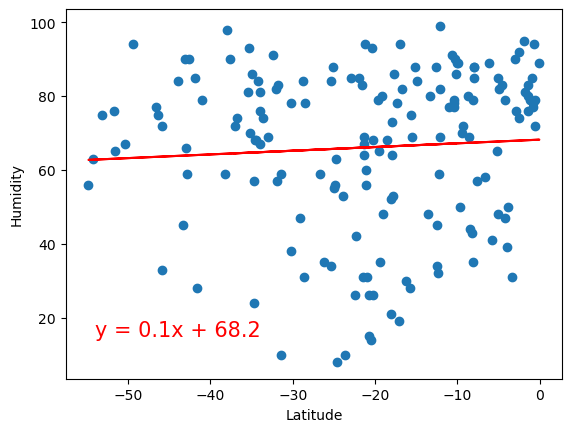

In [46]:
# Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_hum_south = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_hum_south)
reg_hum_south = intercept + slope * x_lat_south
line_hum_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_hum_south)
plt.plot(x_lat_south,reg_hum_south,"r")
plt.annotate(line_hum_south,(-54,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear relatioship between latitude and humidity is statistically insignificant for both hemispheres, as the regression line is similar, regardless of the latitude value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.0005367752041490908


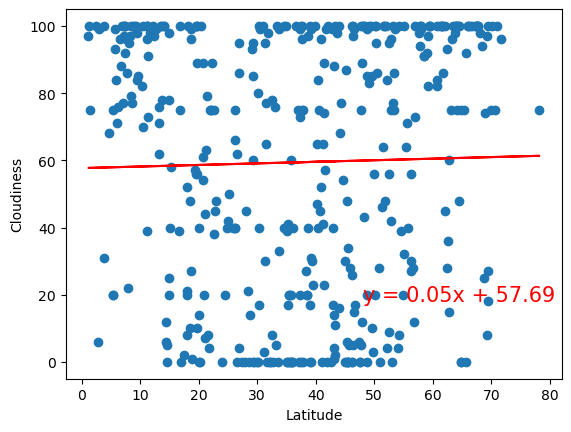

In [48]:
# Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_cloud_north = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloud_north)
reg_cloud_north = intercept + slope * x_lat_north
line_cloud_north = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_cloud_north)
plt.plot(x_lat_north,reg_cloud_north,"r")
plt.annotate(line_cloud_north,(48,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.06107967450012323


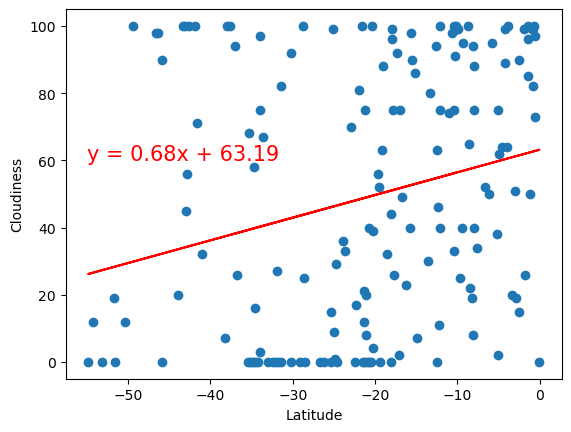

In [53]:
# Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_cloud_south = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloud_south)
reg_cloud_south = intercept + slope * x_lat_south
line_cloud_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_cloud_south)
plt.plot(x_lat_south,reg_cloud_south,"r")
plt.annotate(line_cloud_south,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** By comparing the linear relationships for the northern and southern hemispheres between latitude and cloudiness, we can weakly conclude that cloudiness increases at a higher rate when approaching the equator from the negative latitude value than when straying away from the equator in a positive latitude value. The relationship is statistically stronger in the southern hemisphere, but there are no clear and direct conclusions to draw.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.0001322647566073498


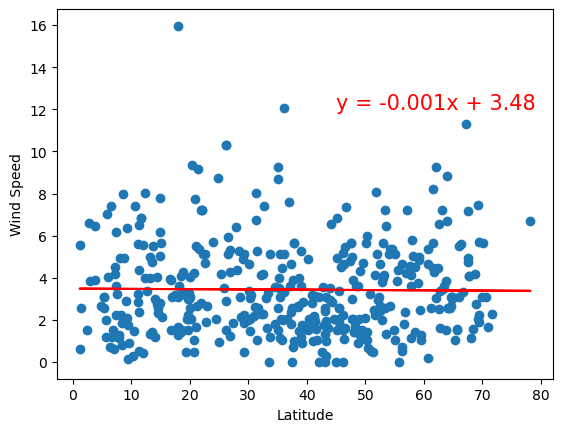

In [57]:
# Northern Hemisphere
x_lat_north = northern_hemi_df['Lat']
y_wind_north = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_wind_north)
reg_wind_north = intercept + slope * x_lat_north
line_wind_north = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_north, y=y_wind_north)
plt.plot(x_lat_north,reg_wind_north,"r")
plt.annotate(line_wind_north,(45,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-squared value is: 0.023919191927500662


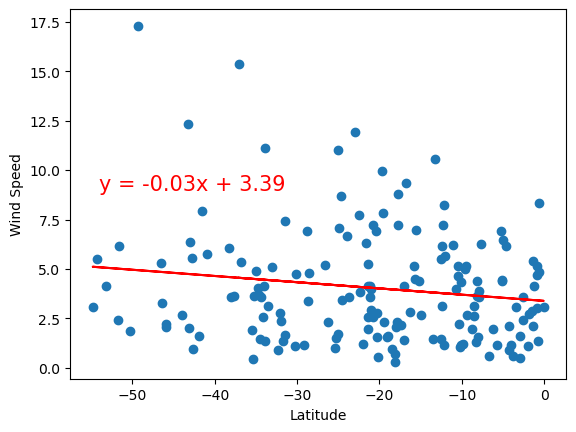

In [59]:
# Southern Hemisphere
x_lat_south = southern_hemi_df['Lat']
y_wind_south = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_wind_south)
reg_wind_south = intercept + slope * x_lat_south
line_wind_south = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=x_lat_south, y=y_wind_south)
plt.plot(x_lat_south,reg_wind_south,"r")
plt.annotate(line_wind_south,(-54,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind speeds weakly decrease toward the equator from the negative latitude values, but has a statistically insignificant relationship in the northern hemisphere. Although the r-squared value is relatively higher in the southern hemisphere, we cannot be confident in our conclusions, as only 0.0013% of the variability observed in wind speeds is explained by the regression model.